In [12]:
%matplotlib inline

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


from sklearn.model_selection import train_test_split

# Softmax function,Cross Entropy Loss and Gradient descent.
author: daodeiv (david stankov)

<h5>
    <font color=' #263a61 ' >
        The standart softmax function $\sigma: \; \Re^k \; \rightarrow \; \Re^k $ is defined by formula : <br>
    

   </font>    
</h5>
<h2><font color='#1c5cd9' > $$\sigma(z)_i= \frac{e^z_i}{\sum_{j=1}^n e^{z}_{j}}$$  
     </font> 
</h2>
<h7>
    <font color='#263a61' >Before getting deeper into the above equation, we gonna generate our learning data. The data consist of records contains a different type of vehicles together their sizes. The dataset is very simple since we would be able to do prediction per our brain, without using any ML concept however in the beginning, our purpose is not to make a prediction our purpose is diving into the basic concepts behind softmax underlying on math.
    
   </font>
</h7>  

<h5>
    <font color=' #263a61 ' >
        Let's generate our data : <br>
    

   </font>    
</h5>

In [21]:
#generate tractor records with random size between [4,5] 
tractor_dataframe= pd.DataFrame(data=np.random.random((30, 3))+4,columns = ['x_size','y_size','z_size'])
tractor_dataframe['label'] =pd.DataFrame( np.full((1,30 ), 'Tractor').T)

#generate car records with random size between [3,4] 
car_dataframe= pd.DataFrame(data=np.random.random((30, 3)) + 1,columns = ['x_size','y_size','z_size'])
car_dataframe['label'] =pd.DataFrame( np.full((1,30 ), 'Car').T)

#generate bus records with random size between [2,3] 
bus_dataframe= pd.DataFrame(data=np.random.random((30, 3))+2,columns = ['x_size','y_size','z_size'])
bus_dataframe['label'] =pd.DataFrame( np.full((1,30 ), 'Bus').T)

# joint each data frame into  one
data = tractor_dataframe.append(bus_dataframe).append(car_dataframe)
data = pd.get_dummies(data) 
data



,x_size,y_size,z_size,label_Bus,label_Car,label_Tractor
0,4.203818,4.666909,4.086120,0,0,1
1,4.788860,4.522800,4.893825,0,0,1
2,4.587386,4.920355,4.176234,0,0,1
3,4.555912,4.420434,4.818734,0,0,1
4,4.923830,4.078491,4.329376,0,0,1
...,...,...,...,...,...,...
25,1.412069,1.273014,1.046412,0,1,0
26,1.599903,1.766137,1.354414,0,1,0
27,1.462978,1.003001,1.094916,0,1,0
28,1.110654,1.714280,1.715052,0,1,0


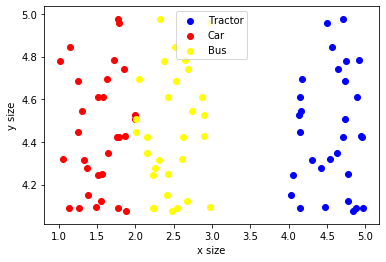

<h5>
    <br>
    <font color='#454214' >
       The above scatter plot shows the simplicity of the classification problem because it is obvious how they are separated into classes. <br> <br>
     </font>    
   <br>
</h5>

In [19]:
x_train = np.array(data.drop(['label_Bus','label_Car','label_Tractor'], axis = 1)) # gets the target label variables
y_train = np.array(data[['label_Bus','label_Car','label_Tractor']]) # gets feature variables 
X_train, X_test, y_train, y_test = train_test_split(x_train,y_train, test_size=0.33, random_state=42) #separats into test and train samples 
print('first 3 record of x train', X_train[ : 4] )
print('first 3 record of y label ', y_train[ : 4] )

print('shape of x train (n.m)', X_train.shape)
print('shape of y label (n,k)', y_train.shape )

first 3 record of x train [[4.87703442 4.08854767 4.71603313]
 [1.77165227 1.16707245 1.71898848]
 [4.77579936 4.24984133 4.01672021]
 [2.1497537  2.39400013 2.04626256]]
first 3 record of y label  [[0 0 1]
 [0 1 0]
 [0 0 1]
 [1 0 0]]
shape of x train (n.m) (60, 3)
shape of y label (n,k) (60, 3)


<h5>
    <br> <br> <br>
    <font color='#053157'> $\; \; \; $In softmax regression we replace sigmoid function by so-called softmax function 
          $\phi_{softmax (.)}$. Where we difine the net input as :  
          <br> <br>
   </font>
   <font color='#3b051d' >
      $$ z = w_1 x_1 + ...+w_nx_n +b = \sum_l^mw_lx_l +b = W^T +b$$
   </font>
   <br> <br>
   <font color='#053b3b'>
     (W is the weight vector, X is is the feature of 1 training example, and b is bias unit ) <br> <br>
    
Now,softmax function computes the probability that this training example $x^{(i)}$ belongs to class j given the weight and net input $z^{(i)}$. <br>
So we compute the probability $p(y=j | x^{(i)};W_j)$ for each class label in j=1,...,k..Note the normalization term in the denominator which causes these class probabilities to sum up one. <br>
<br> <br> 
Our training sample consist of $(n_{samples} ,m_{features})$ = (60,3) and label consist of  are ( k_{classes} ) =  (3)
therefore  the weight matrix is $m\times k = 9$ or  $(m_{features},k_{classes}(probabilities) = (3 ,3)$ dimensional matrix.  

To compute the net input $z$, we mutiply feature matrix with weight matrix  $(n_{samples} ,m_{features})\times (m_{features} ,k_{classes})\; (60,3)\times(3,3) $ wich yields a $60 \times 3 $ to wich we then add the bias unit.Mathematicaly look like this:
 </font> 
</h5>  

 <h5>
    <font color='#3f450f' > weight vector : </font>
  <font color='#053b32' > 
     <br>  
    $$ W= \begin{bmatrix} weight_1\rightarrow class \; 1(bus) \\ weight_2\rightarrow class\;  2(car) \;   \\ weight_3\rightarrow class \;3(tractor) \;  \end{bmatrix} =
    \begin{bmatrix} \vec w_1 \\  \vec w_2\  \\ \vec w_3  \end{bmatrix} =\begin{bmatrix} w_{11} & w_{12} & w_{13} \\ w_{21} & w_{22} & w_{23} \\ w_{31} & w_{32} & w_{33} \end{bmatrix}  $$ 
   <br>
    

   
 </font>
<h5>

 <h5>
    <font color='#454214' > net input $Z$ vector : </font>
  <font color='#454214' > 
     $$ Z = 
    \begin{bmatrix} x_{11} &  x_{12} & x_{13} \\  x_{21} &  x_{22} & x_{23} \\ ... & ... & ... \\ x_{n1} &  x_{n2} & x_{n3} \end{bmatrix} \times \begin{bmatrix} w_{11} & w_{21} & w_{31}  \\ w_{12} & w_{22} & w_{32} \\  w_{13} & w_{23} & w_{33}\end{bmatrix} + \begin{bmatrix}  b_1 \\  b_2\  \\  b_3  \end{bmatrix}  =   \begin{bmatrix} z_{11} &  z_{12} & z_{13} \\  z_{21} &  z_{32} & z_{33} \\ ... & ... & ...  \\ z_{n1} &  z_{n2} & z_{n3}  \end{bmatrix} $$ <br>
        
   <br>
       $$z_{ij} = \sum_l^3 x_{ip} w_{jp} + b_j $$
       $$ Z = XW^{T} +b $$
    

   
 </font>
<h5>

<h7>
    <br> <br> <br>
    <font color='#053157'> 
Now, it's time to compute the softmax activation that we discussed earlier : <br> <br>
 $$ P(\; y=j\;|\;z^{(i)}) = \phi_{softmax}(z^{(i)}) = \frac{e^{z^{(i)}}} {\sum_i^k e^{z_k^{(i)}}} $$
 <br> <br>
 
 
$\; \; $In softmax regression settings, we are interested in multi-class classification and so the label y can take many values rather then only two. Thus in our training  we have $k_i\ in {1,2,3}$.
Given a test input x, we want our hypotesis to estimate the probability  $P(y=k|x_i)$ (y=k_i), i.e prediction of one label ,accoring to one samle(row) x_i) for each value of $k = {1,2,3}$ i.e we want to estimate the probability of class label taking on each of the $K$ different posible values. Thus, our hypotesis will output a K-dimensianal (3) vectors (whose element sum up to 1) giving us our K estimated probabilities. Concretely, our score(hypotesis) function $f(x,W)$ takes the form : <br>
  </font> 
</h7> 

<br> <br>
 <h5>
   <font color='#454214'>
         $$ f(x|W) = \begin{bmatrix} P(y=1 |x;W) \\  P(y=2 |x;W)  \\ ... \\ P(y=n |x;W)  \end{bmatrix} = 
 \frac{1}{\sum_{j=1}^k exp(W_j^Tx)} = \begin{bmatrix} exp(W_1^Tx) \\  exp(W_2^Tx)  \\ ... \\ exp(W_n^Tx)  \end{bmatrix}$$
  <br> <br> 
   </font>
 </h5>       

  <h5>
 </font>
 According to our dataset
  <font color='#454214'>
 $$ f(x|W) = P = \begin{bmatrix} P(y=1 |x_{1j} ; w_{1j}) &  P(y=2 |x_{2j} ; w_{2j})  & P(y=3 |x_{1j} ; w_{3j}) 
        \\ ... &  ...  & ...
        \\ P(y=1 |x_{nj} ; w_{1j}) &  P(y=2 |x_{2j} ; w_{2j})  & P(y=3 |x_{1j} ; w_{3j})
        \end{bmatrix} = 
        \begin{bmatrix} \frac{e^{z_{11}}}{\sum_{1j}e^{z_{1j}}} & \frac{e^{z_{12}}}{\sum_{1j}e^{z_{1j}}} & \frac{e^{z_{13}}}{\sum_{1j}e^{z_{1j}}} 
        \\   \\ ... & ... & ...  \\
        \\    \frac{e^{k_{n1}}}{\sum_{j}^3e^{z_{nj}}} & \frac{e^{z_{n2}}}{\sum_{j}^3e^{z_{nj}}} & \frac{e^{z_{n3}}}{\sum_{j}^3e^{z_{nj}}}\end{bmatrix} $$ 
  </font> 
   <h5>

 <h6>
 <br> <br>
        <font color='#1a403c' >
        The elements of $P$ we will called predictors $p_{ij}$ wich can be interpretated as probability i_th row element
        to be j_th categorical value.If $p_{1,2}$ means what is the probability that record one belongs to the label_ bus?
        Ofcourse, $p_{ij} \in [0,1]$ <br>
        Another way to express $p_{ij}$ : <br>  <br> 
        For example, the probability record one $X_1$ from dataset to be from class label $Y_2$ can be calculated in this way :
         </font> 
      <br> 
 </h6>  
      
   

 <h3>
     <font color='#454214'>
        $$softmax(Z)_{12}=P(y=2 |x_{1j};\; w_{2j})=  \;p_{12}\;  = \frac{ e^{ ^{z_{12}} } }{ \sum_p^3 e^{z_{1p}}}=\frac{ e^{ (^{\sum_v^3 x_{1v}.w_{vj} + b_v }} )}{ \sum_p^3 e^{ ^ ({\sum_v^3 x_{1v}.w_{2v}} + b_2})}$$
  </font>
</h3>  

 <h5>
 <br> <br>
        <font color='#263a61' >
         Let to see how an above considering can be applied concretely in our training dataset :
             First, let to define a weight vector $W$ <br> <br>
            $$W = \begin{bmatrix} w_{11} & w_{12} & w_{13} \\ w_{21} & w_{22} & w_{23} \\ w_{31} & w_{32} & w_{33} \end{bmatrix}  =
            \begin{bmatrix} 0.75776811 & 0.6690284 & -0.02646755 \\
 -2.94775864 &  -3.06439323 & -2.14043833\\
  2.18999053 & 2.39536483 &  2.16690588 \end{bmatrix}$$
  <br> <br>
    $$B = \begin{bmatrix}  b_1 \\  b_2\  \\  b_3  \end{bmatrix} = \begin{bmatrix}  -0.15425504 \\ 18.81781451 \\ -18.66355947 \end{bmatrix} $$ <br> <br>
     I've prepared weight vector $W$ and bias $B$ in advance, how? We will see later. <br>
            
            
          
 </font>
</h5>     
=

In [17]:
W= np.array([[ 0.75776811,  0.6690284 , -0.02646755],
 [-2.94775864, -3.06439323, -2.14043833],
 [ 2.18999053 , 2.39536483,  2.16690588]])

B = intercept = np.array([ -0.15425504 , 18.81781451, -18.66355947])  

In [18]:
def sofmax(x,W,intercept):
    '''
    soft max product 
    takes :
    x feature matrix (train data)
    W weight matrix
    intercept Bias vector
    '''
    exp_z = np.exp(x.dot(W.T)+intercept) # calculate each z_ij
    sums=np.sum(exp_z, axis=1) # array consist
    result = (exp_z.T/sums).T 
    return result

In [22]:
print('original data label Y :  ')
print(y_train[1:10])
print('')
print("predicted data label Y' :")
print(np.around(sofmax(X_train,W,intercept)[1:10],2))

original data label Y :  
[[0 1 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]]

predicted data label Y' :
[[0.01 0.99 0.  ]
 [0.01 0.   0.99]
 [0.9  0.09 0.  ]
 [0.91 0.09 0.  ]
 [0.01 0.   0.99]
 [0.86 0.13 0.  ]
 [0.89 0.11 0.  ]
 [0.01 0.   0.99]
 [0.03 0.97 0.  ]]


 <h7>
 <br> <br>
        <font color='#263a61' >
            From $Y'$ output let to consider the first row : <br> <br>
            $Y'_{11} = 0.01 \rightarrow  $ has  0.1% chance that row one belongs to class 1(BUS) <br> 
            $Y'_{12} = 0.98 \rightarrow  $ has 98% chance that row one belongs to class 2(CAR) <br> 
            $Y'_{13} = 0.01 \rightarrow  $ has 0.1% chance that row one belongs to class 3(TRACTOR) <br> <br>
            That means record $X_1$ belongs to class Car, because has the 90% chance, which is the largest. <br> <br> <br> 
            
            
 If we compare     $Y$ and $Y'$ we will notice that our prediction has 100% accuracy. <br>
But, how have I  found a weight matrix $W$ and bias &B&.I just used the LogisticRegression from scikit-learn, and took the coefficients, but now we gonna define a Loss function ant its optimization in order to find the weght $W$ and bias $\vec b$. 
         </font>
 </h7>        
         

 <h7>
 <br> <br>
        <font color='#263a61' >
        Now we are going to Loss function  for : 
    </font>
</h7>
</h3>
     <font color='#454214'>
            $$(1) \; \; \; softmax(Z)_{ij}=p_{ij}=\frac{e^{z_{ij}}}{\sum_l^k e^{z_{il}}} $$ <br>
            $$z_{ij} = \sum_p^3 x_{ip} w_{jp} + b_j $$
   </font>
   
</h3>
 <h7>
 <br> <br>
        <font color='#263a61' >
        The loss function for Softmax regression is called Cross-Entropy Loss or Sofmax Loss and it is defined like that:    
    </font>
</h7>
<h3>
     <font color='#454214'>
            $$ (2) \;  \; \;L(W,b)=-\sum_i^n\sum_j^k y_{ij} \log (sofmax(Z)_{ij})$$ <br> <br>

   </font>
 </h3>  
 <h7>
 <br> <br>
        <font color='#4561bf' >
       where n is a count of records , $y_{ij}$ is label value of i_th record j_th class, $softmax(Z)_{ij}$ predicited label value  $Y'_{ij}$ <br>
     and $W$ is weight matrix and $b$ bias. <br> 
     Our purpose in to fit parameters  $w_{ij}\in W$ and $b_j$ according to 
 a training data $X$  and a label data $Y$ in order to make the best prediction.To do that we will apply Gradient descent as a regression technique over Softmax loss function.The eq.(2) is the function of all weights $w_{ij}$, bias $b_j$ all training data x and label data y.       
    </font>
</h7>   
  </h3>

<h7>
 <br> <br>
        <font color='#263a61' >
            First, We gonna introduce some math technics which will make our work easier, and we will find derivates of some function which will be extremely useful in the process of finding of $\nabla L(W,b)$. <br> <br>
            For simplicity in the summation process of indices, we will introduce a <a href='http://physics.csusb.edu/~prenteln/notes/vc_notes.pdf'>Kronecker symbol</a> .<br>
    </font>    
</h7> 

 <h3>
     <font color='#454214'>
       $$\delta_{ij} =    
         \begin{equation}
   \begin{Bmatrix} 
   1 & if \; i=j  \\
   0 & if \; i\ne j  
    \end{Bmatrix} 
\end{equation}$$
  <br><br>
          $$ \delta_{ij} = \begin{bmatrix} 1 & 0 & 0  \\ 0 & 1 & 0 \\  0 & 0 & 1 \end{bmatrix}$$
  </font>
 </h3>    
 <h7>
 <br> <br>
        <font color='#263a61' >
           In many places in the coming sum operations over indexes we will miss the $\sum$ symbol, just it will be avoided(hidden) according to the .<a href='https://en.wikipedia.org/wiki/Einstein_notation'>Einstein summation convention</a> .<br>
       For example, the eq. $$z_{ij} = \sum_l^3 x_{ip} w_{jp} + b_j $$ by applying Enstein convetion we could rewrite it as :
         $$z_{ij} = x_{ip} w_{jp} + b_j$$  
   The sign $\sum_p$ is miss.The sumation over p  is implied(by default) because p is repeated twice.Every time when there are repeatable indices that is the indicator for exist of $\sum$  which is just missing(The sum sign  is not written).
    </font>    
</h7> 


 <h7>
 <br> <br>
        <font color='#263a61' >
            Let find some necessary derivatives: 
         </font> 
</h7>    
 <h2>
     <font color='#454214'>
         $\;\;\;\;\;\;\;\;  \frac{\partial z_{mv}}{\partial w_{ij}} =\frac{\partial (x_{mp} w_{vp} + b_v)}{\partial w_{ij}}$ <br> <br>
       $\;\;\;\;\;\;\;\;\;\;\;\;\;\;  =  \frac{ x_{mp} \partial w_{vp} }{\partial w_{ij}} +\frac{\partial b_v}{\partial w_{ij}} $
  </font>
</h2>
 <h7>
     <br>
     <font color='#1c5cd9' >
          $\;\;\;\;\;\;\;\;\;\;\;\;\;\; \;\;\;\;\;\;\;  \;\;\;\;\;\;\;due\; to \; \frac{ \partial w_{vp} }{\partial w_{ij}} =1\; when \; (v=i\;and\; p=j) \;and \;\frac{ \partial w_{jp} }{\partial w_{it}}=0  \;when \; (v \ne i\;or\; p \ne j) \;  we \; could \;introduce\; a\; symbol \; \delta\; and \; write \; \frac{ \partial w_{jp} }{\partial w_{it}}=\delta_{vi}\delta_{pj} $ 
     </font>
 </h7> 
  <h2>
     <font color='#454214'>
        $\;\;\;\;\;\;\;\;\;\;\;\;\;\;  =   x_{mp}\delta_{vi}\delta_{pj} +\frac{\partial b_v}{\partial w_{ij}} $ <br> <br>
  </font>
</h2>
<h7>
     <br>
     <font color='#1c5cd9' >
          $\;\;\;\;\;\;\;\;\;\;\;\;\;\; \;\;\;\;\;\;\;  \;\;\;\;\;\;\;using\; kronicker \;properties \; p \; is\;  replaced by\;  j \; and\;v \; by\;i  $ 
     </font>
 </h7> 
  <h2>
     <font color='#454214'>
        $\;\;\;\;\;\;\;\;\;\;\;\;\;\;  =   x_{mj}\delta_{ii}\delta_{jj} +\frac{\partial b_v}{\partial w_{ij}} $ <br> <br>
       $\;\;\;\;\;\;\;\;\;\;\;\;\;\;  =  \frac{ x_{ip} \partial w_{jp} }{\partial w_{ij}}\delta_{ii}\delta_{jj} +0 $
  </font>
</h2>
<h7>
     <br>
     <font color='#1c5cd9' >
          $\;\;\;\;\;\;\;\;\;\;\;\;\;\; \;\;\;\;\;\;\;  \;\;\;\;\;\;\; i  \; is\;  a\; part\; only \;of \;  \delta_{ii} therefore \;it\; can \; be \;removed \;and \;\frac{\partial b_v}{\partial w_{ij}}=0 $ 
   </font>
 </h7> 
  <h2>
     <font color='#454214'>
        $\;\;\;\;\;\;\;\;\;\;\;\;\;\;  =   x_{mj}\delta_{jj} + 0 $ <br> <br>
      $\;\;\;\;\;\;\;\;\;\;\;\;\;\;  =   x_{mj} $ <br> <br>
  </font>
</h2>
<h7>
     <br>
     <font color='#263a61' >
         !!! The result can be proof using direct verification as well  If someone is not able to understand proof using Kronecker notations.
   </font>
 </h7> 
  <h2>
     <font color='#454214'>
       $$ \;\;(3)\;\;\;\;\;\frac{\partial z_{mv}}{\partial w_{ij}} = x_{mj}$$
  </font>
</h2>
<h7>
     <br>
     <font color='#263a61' >
         In the same way can be proof for bias:
   </font>
 </h7> 
  <h2>
     <font color='#454214'>
       $$ \;\;(4)\;\;\;\;\;\frac{\partial z_{mv}}{\partial b_{j}} = \delta_{vj}$$
  </font>
</h2>
<h7>
     <br>
     <font color='#263a61' >
         Go on!!!
   </font>
 </h7>

<h2>
    <br> <br>
     <font color='#454214'>
         $\;\;\;\;\;\;\;\; \frac{\partial p_{mv}}{\partial w_{ij}} =\frac{\partial p_{mv}}{\partial z_{ij}}\times\frac{\partial z_{ij}}{\partial w_{ij}} $
    </font>
</h2>
<h7> 
    <br>
     <font color='#1c5cd9' >
          $\;\;\;\;\;\;\;\;\;\;\;\;\;\; \;\;\;\;\;\;\;  \;\;\;\;\;\;\;applying\; eq.(3)\; we \;ahcieve  $ 
     </font>
 </h7> 
 <h2>
     <font color='#454214'>
         $\;\;\;\;\;\;\;\; \;\;\;\;\;\; =\frac{\partial p_{mv}}{\partial z_{ij}}.x_{ij}$
    </font>
</h2>

<h2>
    <br> <br>
     <font color='#454214'>
         $\frac{\partial p_{mv}}{\partial z_{ij}} = \frac{\partial \Big(  \frac{e^{^{z_{mv}}}}{\sum_{k=1}^K e^{^{z_{mk}}}}\Big)}   {\partial z_{ij}}$
   <br> <br>
         $\;\;\;\;\; = \frac{1}{(\sum_{k=1}^K e^{^{z_{mk}}})^2}\times\Big( \frac{\partial e^{z_{mv}}}{\partial z_{ij}}\times(\sum_{k=1}^K e^{^{z_{mk}}}) - \frac{\partial (\sum_{k=1}^K e^{^{z_{mk}}})}{\partial z_{ij}}\times e^{z_{mk}}\Big) $
   <br> <br>
   $\;\;\;\;\; = \frac{1}{\sum_{k=1}^K e^{^{z_{mk}}}}\times\frac{\partial e^{z_{mv}}}{\partial z_{ij}} - 
\frac{1}{(\sum_{k=1}^K e^{^{z_{mk}}})^2}\times  \Big(\sum_{k=1}^K \frac{\partial e^{^{z_{mk}}}}{\partial z_{ij}}\Big)\times e^{z_{mv}} $   $\;\;\;\;\;$   \\ line 1     
  </font>
 </h2>

<h2>
    <br> <br>
     <font color='#454214'>
$\;\;\;\;\; = \frac{1}{\sum_{k=1}^K e^{^{z_{mk}}}}\times\frac{\partial e^{z_{mv}}}{\partial z_{ij}} - 
\frac{1}{(\sum_{k=1}^K e^{^{z_{mk}}})^2}\times  (\sum_{k=1}^K  e^{^{z_{mk}}}.\delta_{mi}\delta_{kj})\times e^{z_{mv}} $   $\;\;\;\;\;$ 

<h2>
    <br> <br>
     <font color='#454214'>
$\;\;\;\;\; = \frac{1}{\sum_{k=1}^K e^{^{z_{mk}}}}\times e^{z_{mv}}\delta_{mi}\delta_{kj} - 
\frac{1}{(\sum_{k=1}^K e^{^{z_{mk}}})^2}\times  (\sum_{k=1}^K  e^{^{z_{mk}}}.\delta_{mi}\delta_{kj})\times e^{z_{mv}} $   $\;\;\;\;\;$ 

<h2>
    <br> <br>
     <font color='#454214'>
$\;\;\;\;\; = \frac{1}{\sum_{k=1}^K e^{^{z_{mk}}}}\times e^{z_{mv}}\delta_{mi}\delta_{vj}- \frac{\sum_{k=1}^K  e^{^{z_{mk}}}.\delta_{mi}\delta_{kj}}{\sum_{k=1}^K e^{^{z_{mk}}}}\times \frac{e^{z_{mv}}}{\sum_{k=1}^K e^{^{z_{mk}}}}$ 


<h2>
    <br> <br>
     <font color='#454214'>
$\;\;\;\;\; = \frac{1}{\sum_{k=1}^K e^{^{z_{ik}}}}\times e^{z_{ij}}\delta_{ii}\delta_{jj}- \frac{\sum_{k=1}^K  e^{^{z_{mk}}}.\delta_{mi}\delta_{kj}}{\sum_{k=1}^K e^{^{z_{mk}}}}\times \frac{e^{z_{mv}}}{\sum_{k=1}^K e^{^{z_{mk}}}}$ 

<h2>
    <br> <br>
     <font color='#454214'>
$ \frac{\sum_{k=1}^K  e^{^{z_{ij}}}.\delta_{ii}\delta_{jj}}{\sum_{k=1}^K e^{^{z_{ik}}}}\times \frac{e^{z_{mv}}}{\sum_{k=1}^K e^{^{z_{mk}}}} = p_{ij}p_{mv}$ 

$$\frac{\partial p_{mv}}{\partial z_{ij}}=p_{ij}(1-p_{mv})$$


 <h7>
     <font color='#1c5cd9'>
         <br>
         $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$  if $j=t$ then $\frac{e^{z_{ij}}}{z_{it}} = z_{ij}$ if $j\ne t$ then  $\frac{e^{z_{ij}}}{z_{it}}=0$ (it is simple for proving)  <br> <br>
        $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ For simplicity  as a continue we will separate the function in two cases when $j=t$ and $j\ne t$ <br> <br>
          $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ When $j=t$ we have : <br> <br>
     </font>
 </h7>  
 
 <h3>
     <font color='#454214'>
          $\;\;\;\;\; = \frac{z_{ij}}{\sum_{k=1}^K e^{^{z_{ik}}}} - \frac{1}{(\sum_{k=1}^K e^{^{z_{ik}}})^2}\times \frac{\partial e^{z_{it}}}{\partial z_{it}}\times e^{z_{ij}}$
  </font>
 </h3>  
 
  <h7>
     <font color='#1c5cd9'>
         <br>
        $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$  According to eq(1) we could write: 
        <br> <br>
     </font>
 </h7>  
  <h3>
     <font color='#454214'>
          $\;\;\;\;\;  = p_{ij}(1 -p_{it})$
  </font>
 </h3>  
  
  <h7>
     <font color='#1c5cd9'>
         <br>
        $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ if $j\ne t$ and going on from line 1, we achieve
        <br> <br>
     </font>
 </h7> 
  <h3>
     <font color='#4542141'>
          $\;\;\;\;\; = \frac{1}{\sum_{k=1}^K e^{^{z_{ik}}}}\times 0 - 
\frac{1}{(\sum_{k=1}^K e^{^{z_{ik}}})^2}\times \frac{ e^{z_{it}} }{\partial z_{it}}\times e^{z_{ij}} $
          <br> <br>
          $\;\;\;\;\; = - 
\frac{e^{z_{it}}}{\sum_{k=1}^K e^{^{z_{ik}}}}\times \frac{e^{z_{ij}}}{\sum_{k=1}^K e^{^{z_{ik}}}} $
          <br> <br>
  </font>
  </h3>
    <h7>
     <font color='#1c5cd9'>
         <br>
         $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ Again according to eq(1) we could write: 
        <br> <br>
     </font>
 </h7> 
  <h3>
     <font color='#454214'>
        $\;\;\;\;\; = -p_{ij}p_{it}$
  </font>
  </h3> 
  

  

<h7>
     <font color='#263a61'>
         <br>
         We can write : 
     </font>
 </h7>  
  <h3>
     <br> <br> 
    <font color='#454214'>
$$\frac{\partial p_{ij}}{\partial z_{it}} = 
\begin{pmatrix}
p_{ij}(1 -p_{it}) & \;j=t  \\
-p_{ij}p_{it} & j \ne t 
\end{pmatrix} $$
             
  </font>
  </h3> 

<font color='#263a61'>
         <br>
         the eqution above can  be rewritten : <br> 
     </font>
 </h7>  
   <h3>
     <br> <br> 
    <font color='#454214'>
        $$\;  (4)\; \;\frac{\partial p_{ij}}{\partial z_{it}} = p_{ij}(\delta_{jt} - p_{it})$$ 
        <br> <br>
        $ \frac{\partial z_{ij}}{\partial w_{it}}$ 
        $=\frac{\partial \sum_p^3 x_{ip} w_{jp} + b_j}{\partial w_{it}}=x_{ij}$
         $=\frac{\sum_l^3  x_{ip}\partial w_{jp}}{\partial w_{it}} +\frac{\partial b_j}{\partial w_{it}}=x_{ij}$
    <br> <br>
    $$  (5)\;\;\frac{\partial z_{ij}}{\partial w_{it}}=x_{ij}$$
   </font>
  </h3>  

<h7>
     <font color='#263a61'>
         <br> <br>
         So far so good!!! <br>
         In order to apply gradient descent we have to find all 
         Now let to find derivate of eq.(2) $ L(W,b)=-\sum_i^n\sum_j^k y_{ij} \log (sofmax(Z)_{ij})$ <br> <br>
         we have to find all $$\nabla_{bl}L = \frac{\partial L}{\partial w_{bl}}  = 
 - \sum_k\frac{\partial y_{ij} Log(p_{ij}) }{\partial w_{bl}}$$
       Applying eq (3) and using the Eistent index row we can rewrite euqtion (2) to <br>
         $$\nabla_{it}L = \frac{\partial L}{\partial w_{it}}  = 
 - \frac{\partial y_{ij} Log(p_{ij}) }{\partial w_{it}}$$
         
  </font>
  <h7>
 
 


<h3>
     <br> <br> 
    <font color='#454214'>
$\nabla_{it}L = \frac{\partial L}{\partial w_{it}}  
  =\frac{\partial y_{ij} Log(p_{ij}) }{\partial w_{it}}  $
  <br> <br>
   $\;\;\;\;\; \;\;\;\;\;\;\;\; \;\;\; =
 \frac{ y_{ij}\partial Log(p_{ij}) }{\partial w_{it}} = 
  \frac{1}{p_{ij}} \times \frac{\partial p_{ij}}{\partial z_{it}} \times \frac{\partial z_{ij}}{\partial w_{it}}$
  <br> <br>
  $\;\;\;\;\; \;\;\;\;\;\;\;\; \;\;\; = \frac{y_{ij}}{p_{ij}} \times \frac{\partial p_{ij}}{\partial z_{it}}\times \frac{\partial z_{ij}}{\partial w_{it}} $
  </font>
  </h3>  
   <h7>
     <font color='#1c5cd9'>
         <br>
         $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ By applying eq.(5) and eq.(5) we will achieve: 
     </font>
 </h7> 
 <h3>
     <br> 
    <font color='#454214'>
        $\;\;\;\;\; \;\;\;\;\;\;\;\; \;\;\; = \frac{y_{ij}}{p_{ij}} \times p_{ij}(\delta_{jt} - p_{it})x_{ij} $
      
   <br><br>
    $\;\;\;\;\; \;\;\;\;\;\;\;\; \;\;\; = y_{ij} \times p_{ij}(\delta_{jt} - p_{it}) = y_{ij}(\delta_{jt} - p_{it})x_{ij} $
  </font>
  </h3>
  <h7>
     <font color='#1c5cd9'>
         <br>
         $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ using Kronecker propeties we can replace symbol $t$ with $j$: then we achieve 
     </font>
 </h7> 
  <h3>
    <br><br>
    $\;\;\;\;\; \;\;\;\;\;\;\;\; \;\;\;  = y_{ij}(\delta_{jj} - p_{ij})x_{ij} $
   <br><br>
    $\;\;\;\;\; \;\;\;\;\;\;\;\; \;\;\;  = y_{ij}(1 - p_{ij})x_{ij}$
  </font>
  </h3>

<h7>
     <font color='#263a61'>
         We achived extrmly simple eqation :
         
   <font>
</h7>    
<h2>
    <br><br>
      $$ \frac{\partial L}{\partial w_{ij}} = y_{ij}(1 - p_{ij})x_{ij}$$ 
  </font>
  </h2>
<h7>
     <font color='#263a61'>
         For bias is just :
         
   <font>
</h7> 


                         <h2>
    <br><br>
      $$ \frac{\partial L}{\partial b_{j}} = \sum_i y_{ij}(1 - p_{ij})$$ 
  </font>
  </h2>
  <h7>
     <font color='#263a61'>
         The bias can not be fitted :
         
   <font>
</h7>  